# Initialise parameters
All of these parameters are mainly to ensure we are matching, and will locate, the correct generated data from before.

In [294]:
import numpy as np
# Step 0 - initialise parameters
m = 2000 # size of data

no_x_vecs = 200
no_S_mats = 200


logkmin=0
logkmax=np.log10(m)
logknum=15
KLIST=np.logspace(logkmin,logkmax,logknum,base=10)
delta=0.05 # failure prob

In [295]:
choicevec=['normal','uniform','countsketch','QR1','QR2','QR3']#,'constant1']

# Import data
Data is imported from CSV files in the home directory, which were saved by 'Generate' code.

The last code block in this section rounds the highest value of $k$ in `KLIST` *after importing results using the full value*, to enhance readability in plotting.

At this stage everything should be possible to import, except for Discrete $\pm 1$, which has not been implemented completely into the generation code yet.

In [296]:
EpsForK_Dict={}
EpsListDict={}
Something_worked = False
for choicename in choicevec:
    choicename = choicename.capitalize()
    try:
        pathEpslist=f'CSVs/EpsList_k{logkmin}by{logkmax}by{logknum}m{m}for{no_x_vecs}xvecs{no_S_mats}SmatswithDelta{delta}for{choicename}.csv'
        pathEpsForK=f'CSVs/EpsForK_k{logkmin}by{logkmax}by{logknum}m{m}for{no_x_vecs}xvecs{no_S_mats}SmatswithDelta{delta}for{choicename}.csv'
        EpsListDict[choicename]=np.loadtxt(pathEpslist, delimiter=',')
        EpsForK_Dict[choicename]=np.loadtxt(pathEpsForK,delimiter=',')
        print(f'✅ {choicename} loaded')
        Something_worked = True
    except:
        print(f'❌ {choicename} not found')
        # it didnt exist so do nothing

# Raise an alert if nothing was found
if not Something_worked:
    raise RuntimeError("No CSV imports have worked. Make sure your parameters exactly match between 'generate' and 'plot' sections, and that you have actually run the generate code first!")

CSVs/EpsList_k0by3.3010299956639813by15m2000for200xvecs200SmatswithDelta0.05forNormal.csv
✅ Normal loaded
CSVs/EpsList_k0by3.3010299956639813by15m2000for200xvecs200SmatswithDelta0.05forUniform.csv
✅ Uniform loaded
CSVs/EpsList_k0by3.3010299956639813by15m2000for200xvecs200SmatswithDelta0.05forCountsketch.csv
✅ Countsketch loaded
CSVs/EpsList_k0by3.3010299956639813by15m2000for200xvecs200SmatswithDelta0.05forQr1.csv
✅ Qr1 loaded
CSVs/EpsList_k0by3.3010299956639813by15m2000for200xvecs200SmatswithDelta0.05forQr2.csv
✅ Qr2 loaded
CSVs/EpsList_k0by3.3010299956639813by15m2000for200xvecs200SmatswithDelta0.05forQr3.csv
✅ Qr3 loaded


In [297]:
# rounding for nicer graphs
logkmax=np.round(logkmax,1)

---
# Plot
We plot:
* first the error distribution, with some $\delta$'s overlayed, for the highest value of $k$
    * we need to import the function `eps_needed` to do this
* then our main comparison metric error ($\varepsilon_{max}$) vs $k$
* then the alternative comparison metric, $k_{min}$ vs $\varepsilon$ sampled.

In [298]:
import matplotlib.pyplot as plt
plt.rc('font', family='serif',size=18)

In [299]:
def eps_needed(p_succ,eps_list):
    '''
    Input:
    - p_succ (float) between 0 and 1: probability of success
    - eps_list (list) is the list (of epsilons) we want to take a quantile from

    Output:
    - eps_needed (float)
    '''
    return np.percentile(eps_list, 100 * p_succ)

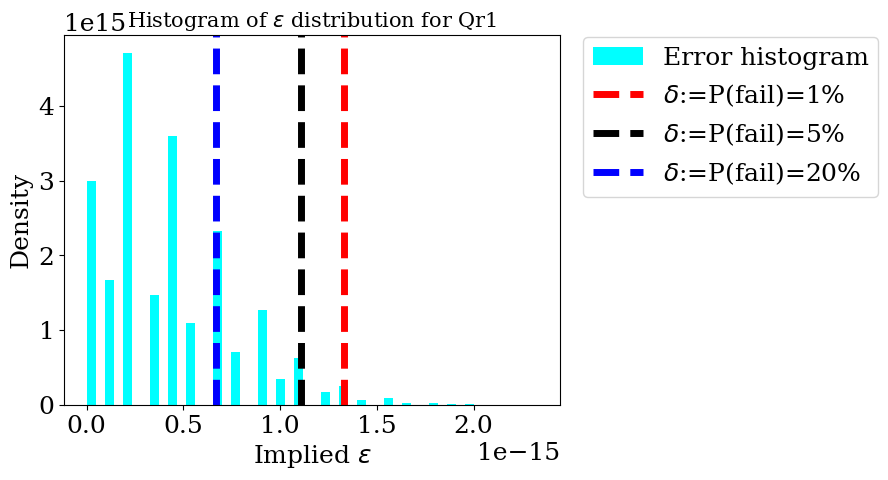

In [300]:
choicename = 'QR1' # EDIT here to the matrix you want to see the Error histogram of.
choicename = choicename.capitalize()
eps_list=EpsListDict[choicename]

plt.xlabel(r'Implied $\varepsilon$')
plt.ylabel('Density')
plt.hist(eps_list, bins=50, color='aqua',density=True,label='Error histogram')
plt.title(fr'Histogram of $\varepsilon$ distribution for {choicename}',size=15)

for delta_loopy,colour in zip([0.01,0.05,0.2],['red','k','blue']):
    epsneed=eps_needed(1-delta_loopy,eps_list)
    plt.axvline(epsneed,color=colour,linewidth=5,linestyle='--',label=fr'$\delta$:=P(fail)={int(100*(delta_loopy))}%')
plt.legend(
    loc='upper left', bbox_to_anchor=(1.02, 1.03)
    )

plt.savefig(f'Plots/k{logkmin}by{logkmax}by{logknum}m{m}for{no_x_vecs}xvecs{no_S_mats}Smatsfor{choice}_EpsDist.png', bbox_inches='tight')

## Error vs $k$

Keeping track of lists:
* the original `choicevec` contained all the matrices we attempted to generate. 
* `EpsForKDict` now contains all the matrices that could successfully be imported (with keys as `capitalize`d choices)
* `selections` contains the matrices we wish to plot, with entries that shortly get capitalized.
    * thus we intersect the keys of `EpsForKDict` and `selections` to find what we *can* plot call this `EpsForK_Dict_selected`, and plot these.

In [301]:
# Choosing what to plot
selections = [
    'NoRmAl',
    #'Uniform',
    'Countsketch',
    'Qr1', 'Qr2', 'Qr3',
    #'Discretepm1',
]
selections = [selector.capitalize() for selector in selections] # capitalize selections
EpsForK_Dict_selected = {key: value for key, value in EpsForK_Dict.items() if key in selections}

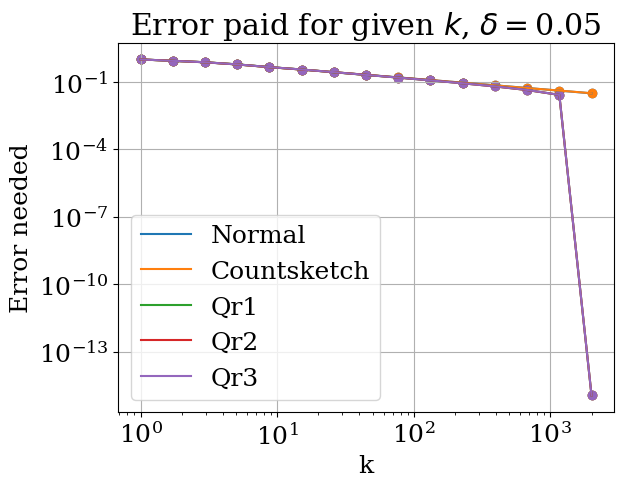

<Figure size 640x480 with 0 Axes>

In [306]:
# Looping through and plotting them
for choicename, EPSNEEDEDFORK in EpsForK_Dict_selected.items(): 
    plt.loglog(KLIST,EPSNEEDEDFORK,label=choicename)
    plt.scatter(KLIST,EPSNEEDEDFORK)

# Grid, labels, axes
plt.grid()
plt.xlabel('k')
plt.ylabel(f'Error needed');
plt.title(rf'Error paid for given $k$, $\delta=${delta}')
plt.legend(
        #fontsize='small',loc='upper left', bbox_to_anchor=(1.02, 1.03)
        )
#plt.ylim(10**(-15.999),10**0.5) # this was used to keep the axes labels consistent when separating out Normal/Countsketch and QR plots.
plt.show()
# Saving the figure
plt.savefig(f'Plots/k{logkmin}by{logkmax}by{logknum}m{m}for{no_x_vecs}xvecs{no_S_mats}SmatsAnd{len(EpsForK_Dict_selected.keys())}choices_ErrorVsK.png', bbox_inches='tight');

# min $k$ for given $\varepsilon_{\text{max}}$

We now plot the 'alternative' comparison metric: the minimum $k$ required to achieve a certain value of $\varepsilon$. 
Since the value of $\varepsilon$ doesn't actually matter, we can generate any random values we like to sample over.

In order to plot this:
* KLIST is fixed by our generation as the logspace from `10^logkmin` up to `10^logkmax`
* we randomly generate some $\varepsilon$'s, chosen by hand based on graphs present, to ensure a representative sample. These may vary depending on use case.
* for each sample $\varepsilon$, we find the minimum $k$ where all the errors are strictly less than this $\varepsilon$, and call this the minimum k for $\varepsilon$.
    * doing this for all sampled $\varepsilon$'s gives us a set of points we can graph.

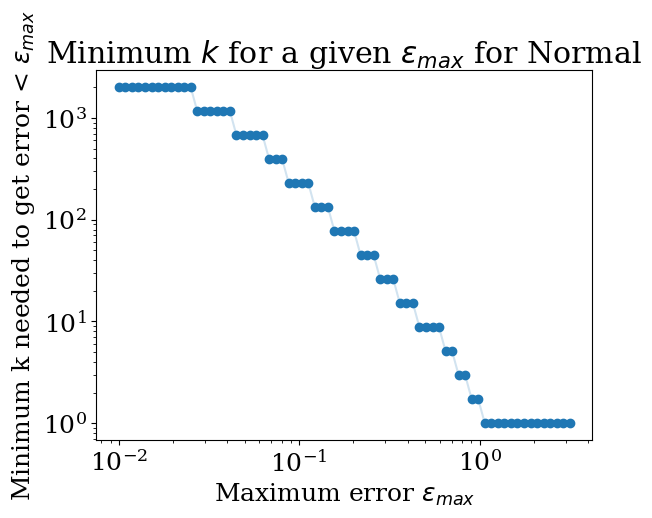

In [303]:
choice='Normal'
## Option for user to input the epsilon they want to check

sample_epsmax_list=np.logspace(-2,0.5,num=70)
min_k_for_epsmax_list = []

for epsmax in sample_epsmax_list:
    try:
        mink = np.min(KLIST[EPSNEEDEDFORK < epsmax])
    except:
        mink = 1.5*10**logkmax # if such a k does not occur, we set this value by default as the maximum.
    min_k_for_epsmax_list.append(mink)

# Labels, title, legend, saving
plt.loglog(sample_epsmax_list,min_k_for_epsmax_list,alpha=0.2)
plt.scatter(sample_epsmax_list,min_k_for_epsmax_list)
plt.xlabel(r'Maximum error $\varepsilon_{max}$')
plt.ylabel(r'Minimum k needed to get error < $\varepsilon_{max}$ ')
plt.title(r'Minimum $k$ for a given $\varepsilon_{max}$ for '+choice)
plt.savefig(f'Plots/k{logkmin}by{logkmax}by{logknum}m{m}for{no_x_vecs}xvecs{no_S_mats}Smatsfor{choice}_MinKforEpsMax_Dist.png')

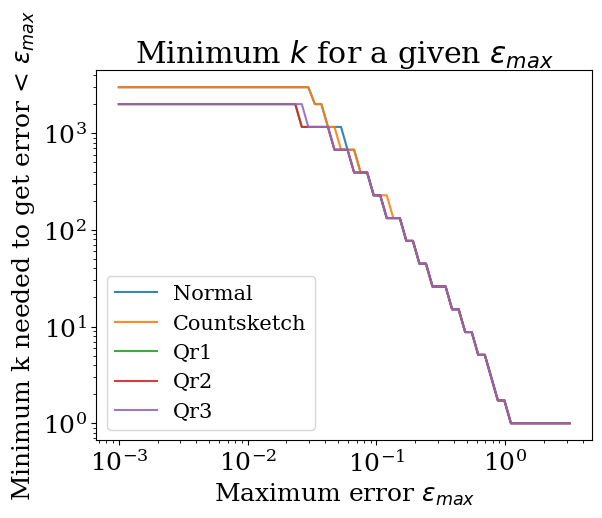

In [305]:
# Sample epsilons are generated. Values here have been chosen by hand based on graphs present, to ensure a representative sample of epsilons, and may vary depending on use case.
sample_epsmax_list=np.logspace(-3,0.5,num=70)

for choicename, EPSNEEDEDFORK in EpsForK_Dict_selected.items(): 
    min_k_for_epsmax_list=[]
    for epsmax in sample_epsmax_list:
        try:
            mink = np.min(KLIST[EPSNEEDEDFORK < epsmax])
        except:
            mink = 1.5*10**logkmax # if such a k does not occur, we set this value by default as the maximum.
        min_k_for_epsmax_list.append(mink)

    plt.loglog(sample_epsmax_list,min_k_for_epsmax_list,alpha=0.9,label=choicename)
    
# Labels, title, legend, saving
plt.xlabel(r'Maximum error $\varepsilon_{max}$')
plt.ylabel(r'Minimum k needed to get error < $\varepsilon_{max}$ ')
plt.title(r'Minimum $k$ for a given $\varepsilon_{max}$')
plt.legend(fontsize='small')
plt.savefig(f'Plots/k{logkmin}by{logkmax}by{logknum}m{m}for{no_x_vecs}xvecs{no_S_mats}Smats_MinKforEpsMax_Dist.png')